# Clasificador de imágenes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

Visualizamos una muestra de las imágenes:

Definimos las rutas

In [2]:
import matplotlib.image as mpimg
from PIL import Image
import os

ruta_train = 'C:\\Users\\isabel\\Desktop\\dogs-vs-cats\\train_mini\\'
ruta_test = 'C:\\Users\\isabel\\Desktop\\dogs-vs-cats\\test_mini'

Visualizamos gatos:

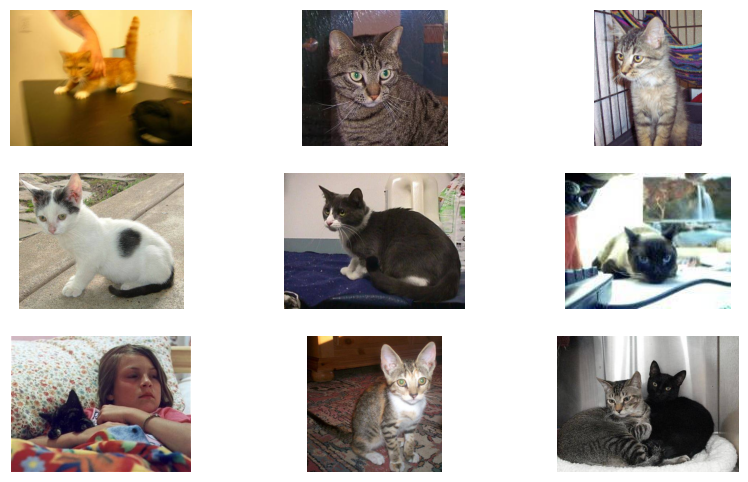

In [3]:
fig, axis=plt.subplots(3,3,figsize=(10,6))

j=0
k=0
for i in range(9):
    
    name=mpimg.imread(ruta_train + '\Cats\cat.' + str(i) + '.jpg')
    
    axis[j,k].imshow(name)
    axis[j,k].axis("off")
    if (i+1)%3==0:
        j+=1
        k=0
    else: 
        k+=1


plt.show()


Visualizamos perros:

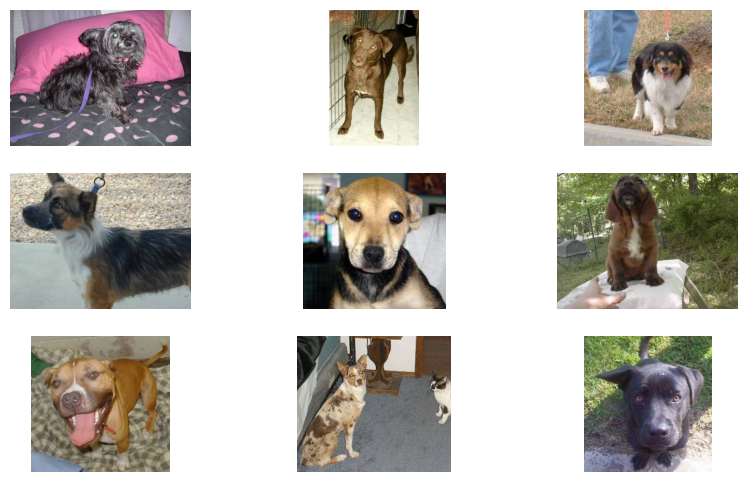

In [4]:
fig, axis=plt.subplots(3,3,figsize=(10,6))

j=0
k=0
for i in range(9):
    
    name=mpimg.imread(ruta_train + '\Dogs\dog.' + str(i) + '.jpg')
    
    axis[j,k].imshow(name)
    axis[j,k].axis("off")
    if (i+1)%3==0:
        j+=1
        k=0
    else: 
        k+=1


plt.show()


Preprocesamos las imágenes de train y de test

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Configurar el generador de imágenes
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

trdata = datagen.flow_from_directory(
    ruta_train,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

tsdata = datagen.flow_from_directory(
    ruta_test,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.
Found 1499 images belonging to 1 classes.


In [7]:
# Obtener las etiquetas (clases) del generador de datos de entrenamiento
class_labels = trdata.class_indices

print(class_labels)

{'Cats': 0, 'Dogs': 1}


Arquitectura de prueba:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))


Optimizar la función de pérdida:

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = "adam", loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])

Entrenamiento del modelo

In [10]:
model.fit(trdata, epochs = 3)

Epoch 1/3


94/94 [==============================] - 1759s 19s/step - loss: 0.7442 - accuracy: 0.4893
Epoch 2/3
94/94 [==============================] - 2982s 32s/step - loss: 0.6936 - accuracy: 0.4920
Epoch 3/3
94/94 [==============================] - 1697s 18s/step - loss: 0.6933 - accuracy: 0.5000


Evaluación

In [11]:
test_loss, test_acc = model.evaluate(tsdata, verbose=2)

print('\nTest accuracy:', test_acc)

47/47 - 196s - loss: 0.6885 - accuracy: 1.0000 - 196s/epoch - 4s/step

Test accuracy: 1.0


Hemos conseguido un accuracy de 1 y una función de pérdida de 0.68, sólo hemos utilizado 1500 fotos para cada clase de la muestra de entrenamiento por el tiempo que requería todo el dataset. Y 3 epochs por el mimso motivo.

Evaluación visual con prevision

1/1 [==============================] - 0s 244ms/step


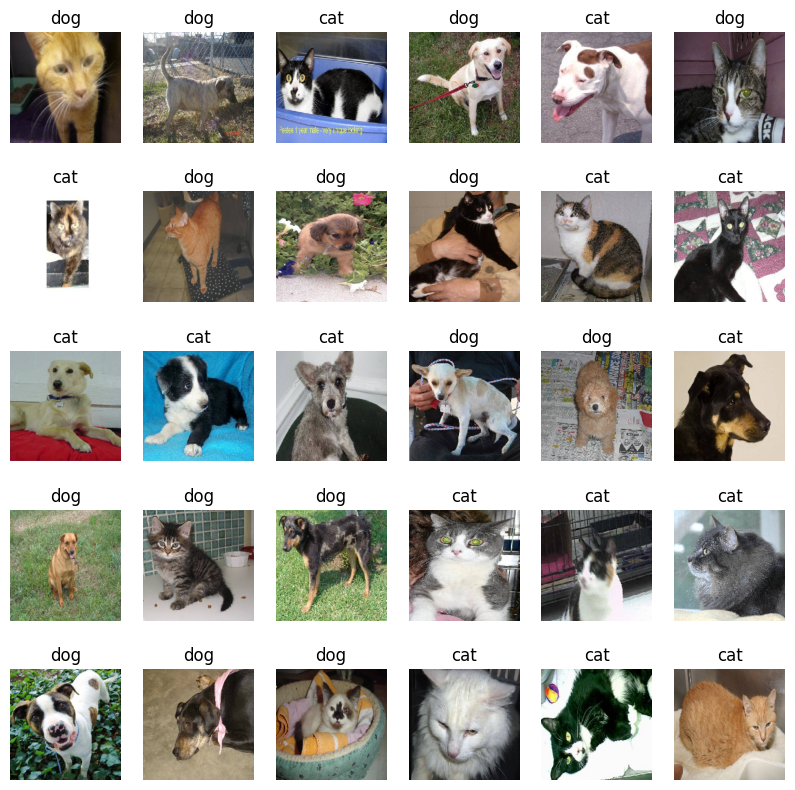

In [40]:
from keras.preprocessing import image
from keras.models import load_model
randoms = np.random.choice(1499, size=30, replace=True)

fig, axis=plt.subplots(5,6,figsize=(10,10))

j=0
k=0
for i in randoms:
    
    img = image.load_img(ruta_test+ "\\test\\"+ str(i)+ ".jpg", target_size = (200, 200))
    img = np.asarray(img)
    axis[j,k].imshow(img)
    img = np.expand_dims(img, axis = 0)
    output = model.predict(img)
    if output[0][0] > output[0][1]:
        axis[j, k].set_title("dog")
    else:
        axis[j, k].set_title("cat")
    
    axis[j,k].axis("off")
    if (k+1)%6==0:
        j+=1
        k=0
    else: 
        k+=1


plt.show()



In [2]:
print(f"Visualmente, en esta prueba, ha acertado:\n9/14 {round(9/14*100,2)}% dogs \n10/16 {round(10/16*100,2)}% cats \nY un total de 19/30 {round(19/30*100,2)}%")

Visualmente, en esta prueba, ha acertado:
9/14 64.29% dogs 
10/16 62.5% cats 
Y un total de 19/30 63.33%


Guardamos el modelo:

In [43]:
from pickle import dump
dump(model, open("Clas_imgs_1500.sav", "wb"))